In [1]:
#practice file for the qiskit book: https://qiskit.org/textbook/ch-states/introduction.html
#Author: Ryan30
#Date: 2020-10-25


#https://qiskit.org/textbook/ch-states/atoms-computation.html
#ch 1.2 - Atoms of computation

#try the widget out
#from qiskit_textbook.widgets import binary_widget
#binary_widget(nbits=6)

#Example 3 - First quantum circuit
#import QC modules
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

#word of advice dont put a number this large because the server crashed, lol.
#n = 8000

n = 8
#this represents the number of qubits in the circuit
n_q = n

#this represents the number of outputs in the circuit
n_b = n
qc_out = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_out.measure(j,j)
    
qc_out.draw()


┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

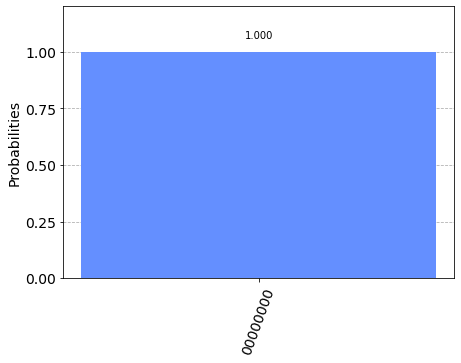

In [2]:
#According to the book we have initialized our qubits to output 0 and we can see that the result is all zeroes
#based on the input so n= 8 has 8 zeros, etc. 
#TODO: read up on the Aer module. It looks like you can swap out your back end which is cool. 
counts = execute(qc_out, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

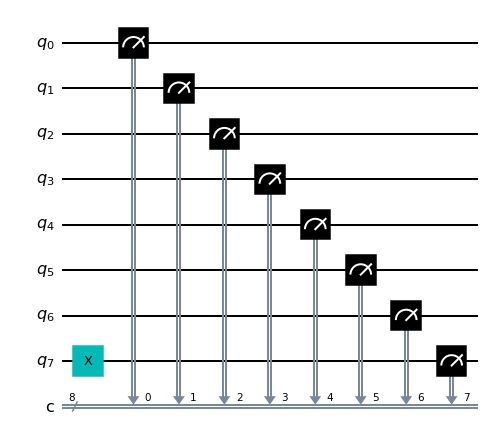

In [3]:
#Example 4.1 - Encoding an input
#Not gate - most basic operation which flips the bits
#I had to manually install a missing module named pylatexenc:
#The class MatplotlibDrawer needs pylatexenc. to install, run "pip install pylatexenc".

qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()
qc = qc_encode + qc_out
qc.draw(output='mpl',justify='none')


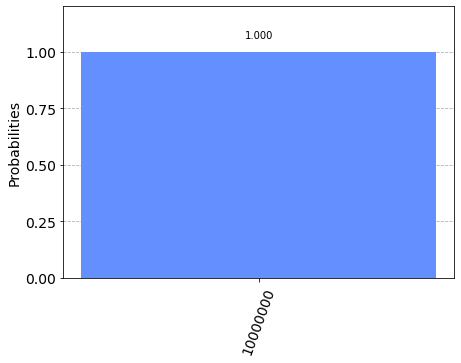

In [4]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [5]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

In [6]:
# 1.2 - Example 4.3 - Adding with Qiskit

#bit addition samples from the book:

#0+0 = 00
#0+1 = 01
#1+0 = 01
#1+1 = 10

#create a circuit with two qubits and try out the controlled-NOT gate (CNOT)
# XOR gate
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

#The first bit acts as the control bit with the black square (dot in the book)
#q1 acts as the target bit with the box with X in side (+ inside a circle in the book)

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [7]:

qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

#table from the book:
#Input (q1 q0)	Output (q1 q0)
#00	00
#01	11
#10	10
#11	01

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [8]:
#4.3 continued - Using two CNOT gates

#create a circuit with 4 input and two outputs
qc_halfadder = QuantumCircuit(4,2)

#now we need to encode the qubits 0 and 1
qc_halfadder.x(0)
qc_halfadder.x(1)
qc_halfadder.barrier()

#make use of the CNOT gates 
#write XOR of the given inputs on q2
#q0 to q2
qc_halfadder.cx(0,2)

#q1 to q2
qc_halfadder.cx(1,2)
qc_halfadder.barrier()

#now for the outputs of this circuit
#q2 to output
qc_halfadder.measure(2,0) # this is the XOR value we want
qc_halfadder.measure(3,1)

qc_halfadder.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [9]:
#4.3 - Toffoli - AND/NAND gate
#https://qiskit.org/textbook/ch-gates/more-circuit-identities.html#ccx
#AND if the initial state of the target was |0>
#NAND if target was |1>

qc = QuantumCircuit(3)
#a and b are the control bits
a = 0
b = 1
#t is the target bit
t = 2

qc.ccx(a,b,t)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [15]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

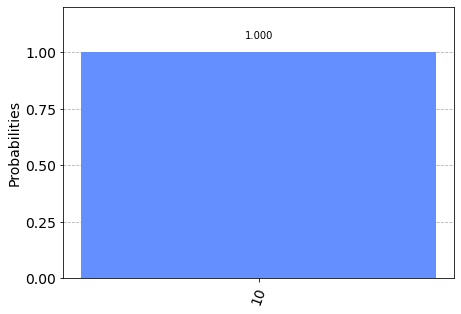

In [16]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [17]:
#mess around with the inputs
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(1) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

░                 ░       
q_0: ───────────░───■─────────■───░───────
     ┌───┐┌───┐ ░   │         │   ░       
q_1: ┤ X ├┤ X ├─░───┼────■────■───░───────
     └───┘└───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ───────────░─┤ X ├┤ X ├──┼───░─┤M├───
                ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ───────────░───────────┤ X ├─░──╫─┤M├
                ░           └───┘ ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

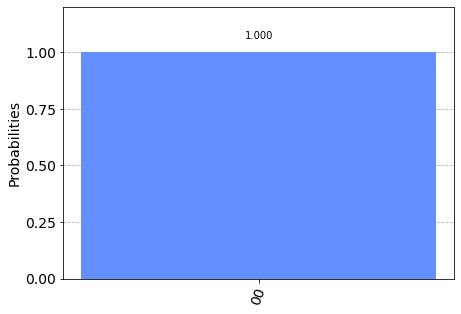

In [18]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [19]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.0',
 'qiskit-aer': '0.7.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-aqua': '0.8.0',
 'qiskit': '0.23.0'}